In [3]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from collections import Counter, defaultdict

In [7]:
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
df = df_[df_["cluster"]==3]

def tokenize(dataset, column):
    from nltk.stem import WordNetLemmatizer 
    import re 
    lemmatizer = WordNetLemmatizer()
    tokenized_sentences = []
    for comment in dataset[column]:
        comment = re.sub("[^-9A-Za-z ]", "" , comment)
        comment = re.sub(r'https?:\/\/?[a-z0-9]+\.[a-z0-9\/]+', 'URL', comment)
        comment = comment.lower()
        tokens = nltk.word_tokenize(comment)
        for word in comment:
            word = lemmatizer.lemmatize(word) 
        
        tokens = " ".join(tokens)
        tokenized_sentences.append(tokens)
    dataset[column] = tokenized_sentences

tokenize(df, "text")

def remove_stopwords(dataset, column):
    stop_words = set(stopwords.words('english')) 
    sentences=[] 
    for comment in dataset["text"]:
        sentence=[] 
        comment = nltk.word_tokenize(comment)
        for word in comment:
            if word not in stop_words:
                sentence.append(word)
        sentences.append(sentence)
    dataset[column] = sentences

remove_stopwords(df,'text')

df.to_csv("topic_3_tokenized_no_stopwords.csv")

C:\Users\vomit\AppData\Local\Temp\ipykernel_3400\209840746.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = tokenized_sentences
C:\Users\vomit\AppData\Local\Temp\ipykernel_3400\209840746.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = sentences


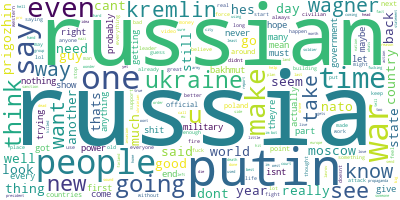

In [8]:
words = " "
for comment in df["text"]:
    for word in comment:
        words += word + " " 

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(words)
wordcloud.to_image()

In [9]:
word_frequencies = Counter()
for sentence in df["text"]:
    for word in sentence:
        word_frequencies[word] += 1
word_frequencies

Counter({'russia': 1515,
         'russian': 1170,
         'putin': 698,
         'russians': 388,
         'like': 383,
         'would': 322,
         'war': 315,
         'people': 250,
         'one': 213,
         'dont': 198,
         'get': 191,
         'even': 172,
         '-': 167,
         'ukraine': 165,
         'going': 164,
         'time': 160,
         'think': 159,
         'wagner': 154,
         'us': 152,
         'military': 152,
         'make': 148,
         'im': 146,
         'could': 140,
         'see': 139,
         'russias': 136,
         'really': 135,
         'know': 132,
         'go': 130,
         'world': 130,
         'putins': 127,
         'kremlin': 125,
         'prigozhin': 125,
         'good': 124,
         'well': 124,
         'way': 123,
         'said': 123,
         'country': 121,
         'take': 119,
         'much': 113,
         'hes': 113,
         'still': 110,
         'want': 110,
         'cant': 107,
         'moscow': 106

In [13]:
df = df_[df_["cluster"]==3]
scoredf = df.sort_values(by=["score"], ascending= False)
for post in scoredf["text"][:200]:
    print(post)

Stop Deceiving the Population’: Russia’s Mercenary Boss Threatens Full-Blown Mutiny
Russians trying to help the Kremlin are being scammed into throwing Molotov cocktails at its offices and cars instead: reports
Russia suffering worst labor shortage in 25 years
> When asked if perhaps the military didn’t want to provide weapons to Wagner out of a fear that the mercenary group “might storm the Kremlin” and seize power, Prigozhin conceded that the idea is “interesting” but said he wasn’t focused on staging a coup.

I'm really surprised he's still alive, with all his shit-talking about the Russian leadership's incompetence.
Prigozhin says Wagner Group may soon cease to exist, as it’s running out of Wagnerites
Two Russian Officials, Allies Of Vladimir Putin, Found Dead on Same Day: Report
Russian Embassy says Poland confiscated all money from diplomatic mission's accounts
Russia promises ‘harsh’ response after Poland seizes Warsaw building
The Western Cape provincial government in South Afr

In [9]:
#df = pd.read_csv("topic_3_tokenized_no_stopwords.csv")
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
df = df_[df_["cluster"]==3]

In [10]:
df = df[df["cluster"]==3]
df = df[df["type"]== "post"]
scoredf = df.sort_values(by=["score"], ascending= False)
i =1
while i<100:
    print(scoredf["text"].iloc[i], "\nSUBRED:", scoredf["subreddit"].iloc[i], "LINK:", scoredf["url"].iloc[i])
    i+=1

Russians trying to help the Kremlin are being scammed into throwing Molotov cocktails at its offices and cars instead: reports 
SUBRED: World News LINK: https://news.yahoo.com/russians-trying-help-kremlin-being-080124434.html
Russia suffering worst labor shortage in 25 years 
SUBRED: World News LINK: https://www.newsweek.com/russia-economy-unemployment-jobs-putin-shortage-1796602
Prigozhin says Wagner Group may soon cease to exist, as it’s running out of Wagnerites 
SUBRED: World News LINK: https://www.pravda.com.ua/eng/news/2023/04/28/7399938/
Two Russian Officials, Allies Of Vladimir Putin, Found Dead on Same Day: Report 
SUBRED: World News LINK: https://www.ndtv.com/world-news/two-russian-officials-allies-of-vladimir-putin-found-dead-on-same-day-report-3981546
Russian Embassy says Poland confiscated all money from diplomatic mission's accounts 
SUBRED: World News LINK: https://www.pravda.com.ua/eng/news/2023/04/26/7399584/
Russia promises ‘harsh’ response after Poland seizes Warsaw 

In [1]:
import pandas as pd
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
topic = df_[df_["cluster"]==3]
topic["topic"] = "Russia: Internal Politics"
topic.to_csv("topic_3_labeled_originaltext.csv")

C:\Users\vomit\AppData\Local\Temp\ipykernel_12716\3775779538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic["topic"] = "Russia: Internal Politics"
